<a href="https://colab.research.google.com/github/Debabarata308/Bike-Sharing-Demand-Prediction-/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# **Importing necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

import warnings
warnings.filterwarnings('ignore')

# **Loading Dataset**

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Capstone Project_2/SeoulBikeData.csv', encoding = "ISO-8859-1")

In [ ]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
data.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
print ('Shape data')
print (data.shape)
print ('\n')
print ('Info Dataset')
print (data.info())
print ('\n')
print ('See if any missing value of Dataset')
print (data.isna().sum())

Shape data
(8760, 14)


Info Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning

# **Preprosecing Data**

In [ ]:
#Check for the null values
data.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [ ]:
data = data.rename(columns={'Temperature(°C)':'Temperature',
                       'Humidity(%)':'Humidity',
                       'Wind speed (m/s)':'wind speed',
                       'Visibility (10m)':'Visibility',
                       'Dew point temperature(°C)':'Dew point temperature',
                       'Solar Radiation (MJ/m2)':'Solar Radiation ',
                       'Rainfall(mm)':'Rainfall',
                        'Snowfall (cm)':'Snowfall '
                       })
data.head()

,Date,Rented Bike Count,Hour,Temperature,Humidity,wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


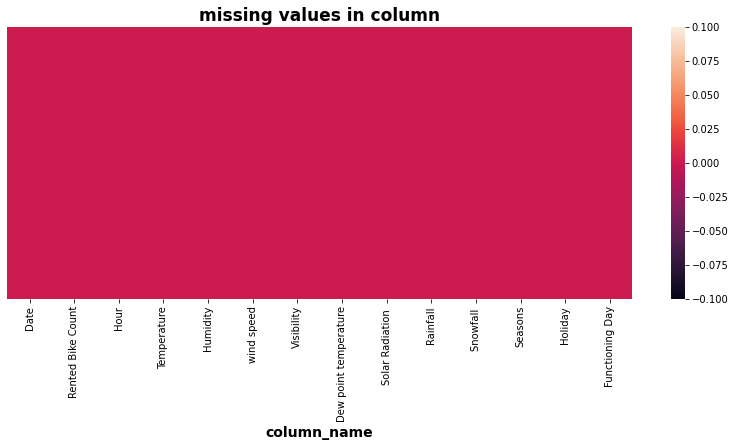

In [ ]:
# Checking missing values
plt.figure(figsize=(14, 5))
sns.heatmap(data.isnull(), cbar=True, yticklabels=False)
plt.xlabel("column_name", size=14, weight="bold")
plt.title("missing values in column",fontweight="bold",size=17)
plt.show()

In [ ]:
# Checking Duplicate Values
value=len(data[data.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


In [ ]:
data.describe().transpose() 

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature,8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity,8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
wind speed,8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility,8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature,8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation,8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall,8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall,8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


In [ ]:
# Numeric Features

numeric_features= data.select_dtypes(exclude='object')

In [ ]:
# Numeric Features info
numeric_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented Bike Count      8760 non-null   int64  
 1   Hour                   8760 non-null   int64  
 2   Temperature            8760 non-null   float64
 3   Humidity               8760 non-null   int64  
 4   wind speed             8760 non-null   float64
 5   Visibility             8760 non-null   int64  
 6   Dew point temperature  8760 non-null   float64
 7   Solar Radiation        8760 non-null   float64
 8   Rainfall               8760 non-null   float64
 9   Snowfall               8760 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 684.5 KB


In [ ]:
data['Date'] = pd.to_datetime(data['Date'])

In [ ]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data.tail()

,Date,Rented Bike Count,Hour,Temperature,Humidity,wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Year,Month,Day
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30
8759,2018-11-30,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30


In [ ]:
data.drop(columns=['Date'] ,axis=1)

,Rented Bike Count,Hour,Temperature,Humidity,wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Year,Month,Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30


In [ ]:
# describing numeric feature
numeric_features.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature,8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity,8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
wind speed,8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility,8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature,8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation,8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall,8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall,8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


In [ ]:
#Extracting categorical features
categorical_features= data.select_dtypes(include='object')

In [ ]:
categorical_features

,Seasons,Holiday,Functioning Day
0,Winter,No Holiday,Yes
1,Winter,No Holiday,Yes
2,Winter,No Holiday,Yes
3,Winter,No Holiday,Yes
4,Winter,No Holiday,Yes
...,...,...,...
8755,Autumn,No Holiday,Yes
8756,Autumn,No Holiday,Yes
8757,Autumn,No Holiday,Yes
8758,Autumn,No Holiday,Yes


# *Exploratory Data Analysis*

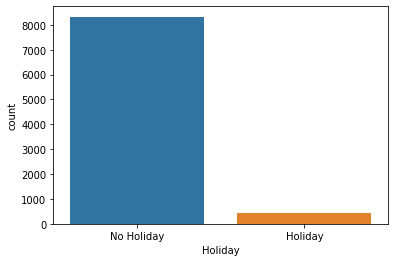

In [ ]:
sns.countplot(x="Holiday", data=data)

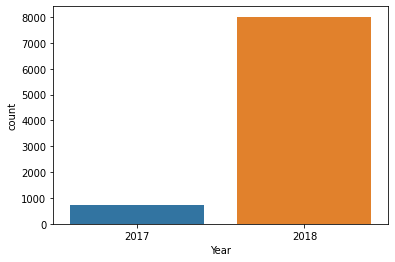

In [ ]:
sns.countplot(x="Year", data=data)

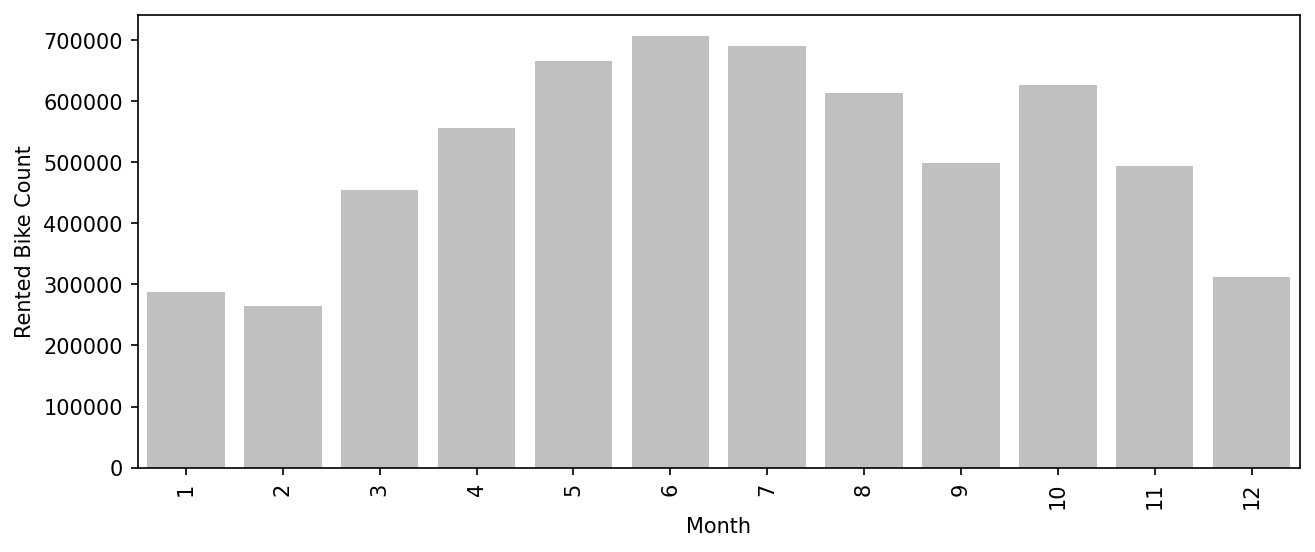

In [ ]:
Month = data.groupby("Month").sum().reset_index()
plt.figure(figsize=(10,4), dpi=150)
sns.barplot(x="Month", y="Rented Bike Count",color="#c0c0c0", data=Month)
plt.xticks(rotation=90);

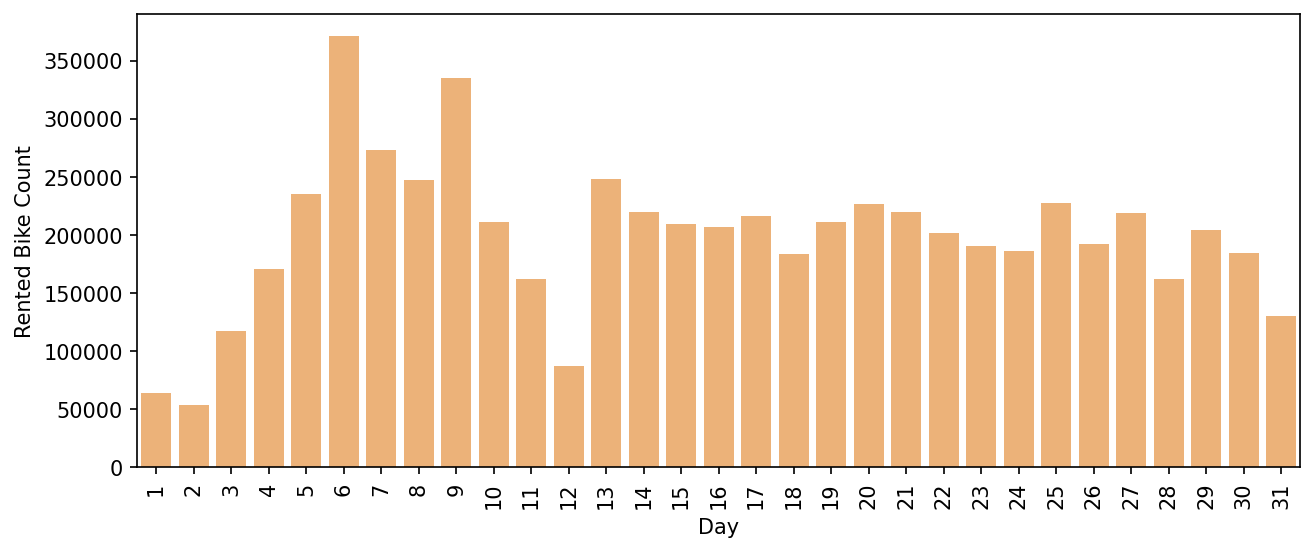

In [ ]:
Day =data.groupby("Day").sum().reset_index()
plt.figure(figsize=(10,4), dpi=150)
sns.barplot(x="Day", y="Rented Bike Count",color='#ffb266', data=Day)
plt.xticks(rotation=90);

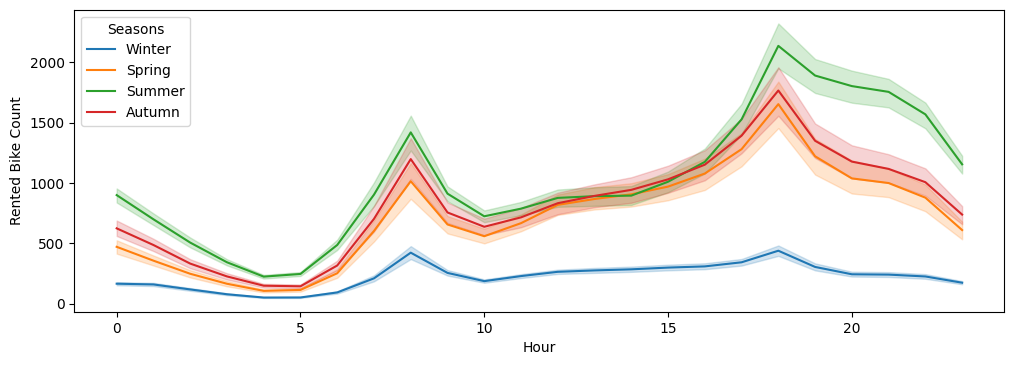

In [ ]:
plt.figure(figsize=(12,4), dpi=100)
sns.lineplot(data=data, x="Hour", y="Rented Bike Count", hue="Seasons")

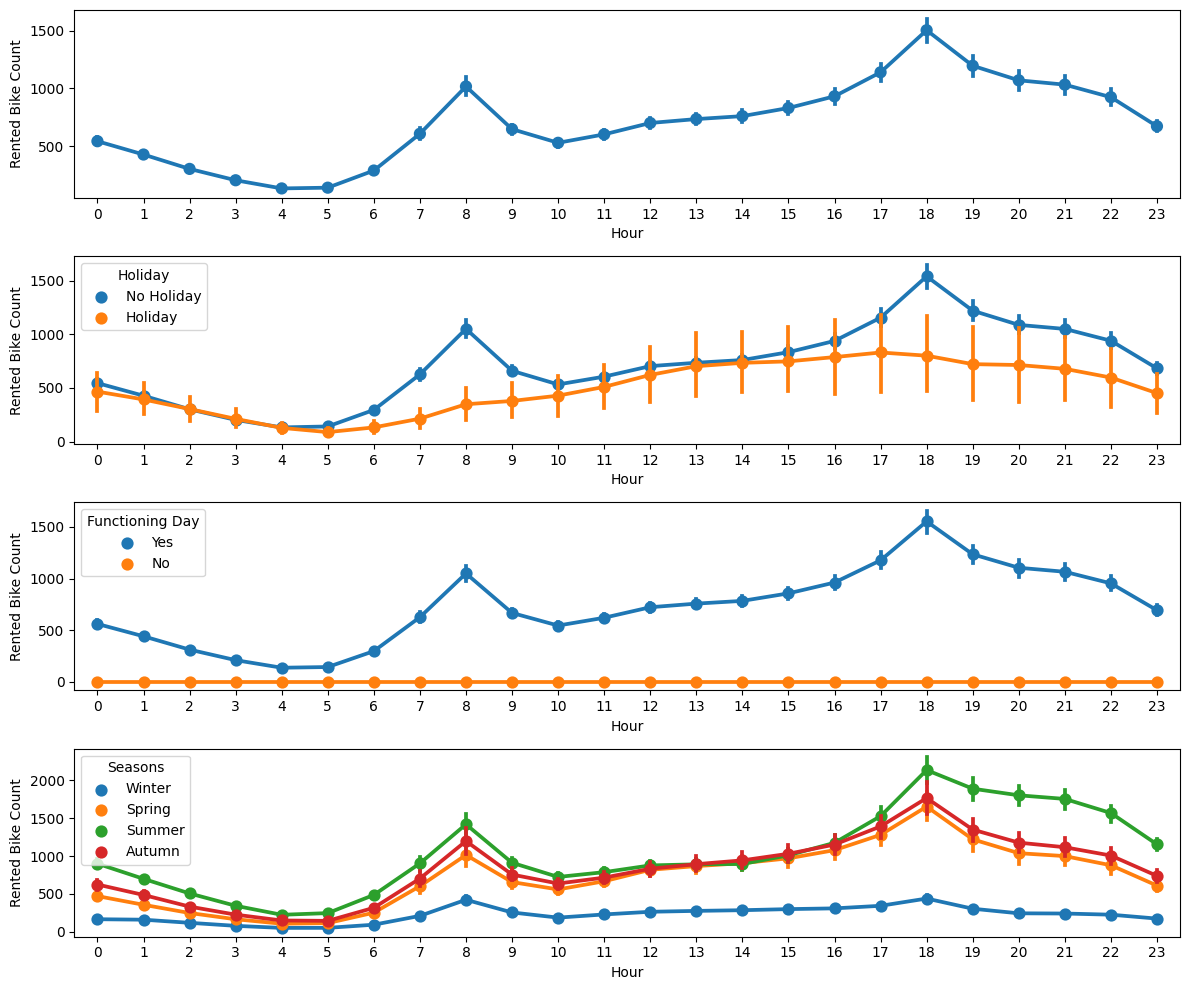

In [ ]:
fig, axs = plt.subplots(nrows=4,ncols=1,figsize=(12,10), dpi=100)
sns.pointplot(data=data, x="Hour", y="Rented Bike Count", ax=axs[0])
sns.pointplot(data=data, x="Hour", y="Rented Bike Count", ax=axs[1], 
              hue="Holiday")
sns.pointplot(data=data, x="Hour", y="Rented Bike Count", ax=axs[2], 
              hue="Functioning Day")
sns.pointplot(data=data, x="Hour", y="Rented Bike Count", ax=axs[3], 
              hue="Seasons")
plt.tight_layout()

In [ ]:

data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature', 'Humidity',
       'wind speed', 'Visibility', 'Dew point temperature', 'Solar Radiation ',
       'Rainfall', 'Snowfall ', 'Seasons', 'Holiday', 'Functioning Day',
       'Year', 'Month', 'Day'],
      dtype='object')

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])

[Text(0.5, 1.0, 'Relation between humidity and users')]

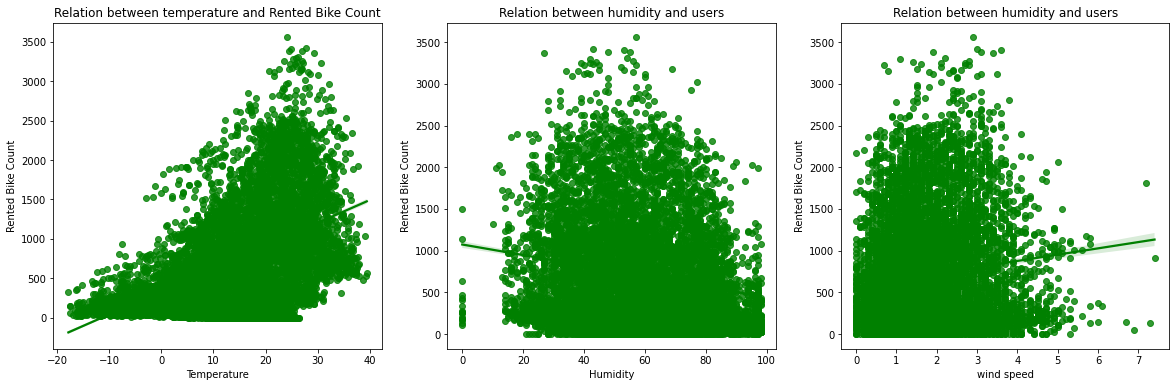

In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, figsize=(20,6))
sns.regplot(x=data['Temperature'], y=data['Rented Bike Count'], ax=ax1 ,color='green')
ax1.set(title="Relation between temperature and Rented Bike Count")
sns.regplot(x=data['Humidity'], y=data['Rented Bike Count'], ax=ax2, color='green')
ax2.set(title="Relation between humidity and users")
sns.regplot(x=data['wind speed'], y=data['Rented Bike Count'], ax=ax3, color='green')
ax3.set(title="Relation between humidity and users")

In [ ]:
categorical_features

,Seasons,Holiday,Functioning Day
0,Winter,No Holiday,Yes
1,Winter,No Holiday,Yes
2,Winter,No Holiday,Yes
3,Winter,No Holiday,Yes
4,Winter,No Holiday,Yes
...,...,...,...
8755,Autumn,No Holiday,Yes
8756,Autumn,No Holiday,Yes
8757,Autumn,No Holiday,Yes
8758,Autumn,No Holiday,Yes


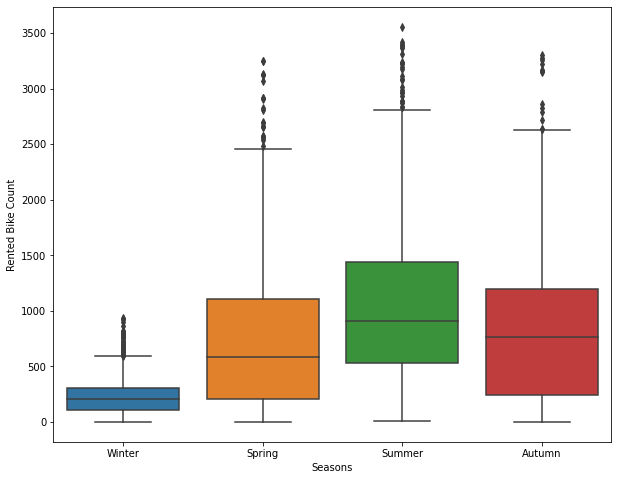

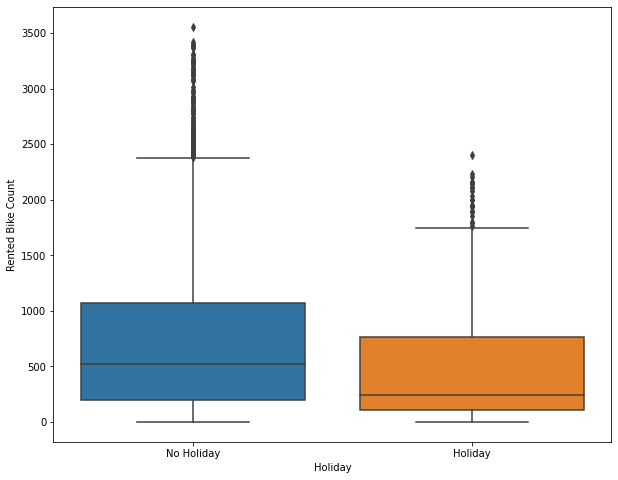

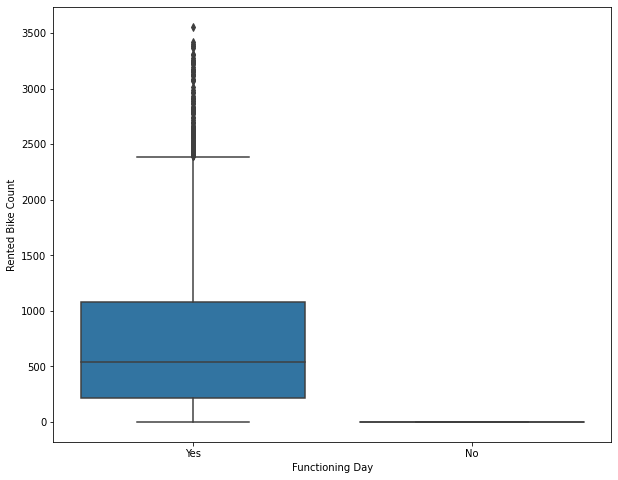

In [ ]:
#ploting Box plot to visualize and trying to get information from plot
for col in categorical_features:
  plt.figure(figsize=(10,8))
  sns.boxplot(x=data[col],y=data["Rented Bike Count"])
  plt.show()

In [ ]:
data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature', 'Humidity',
       'wind speed', 'Visibility', 'Dew point temperature', 'Solar Radiation ',
       'Rainfall', 'Snowfall ', 'Seasons', 'Holiday', 'Functioning Day',
       'Year', 'Month', 'Day'],
      dtype='object')

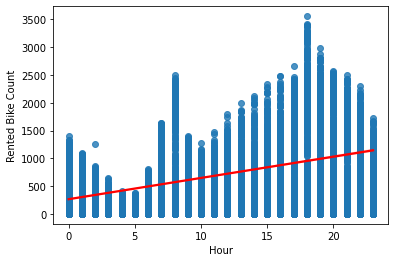

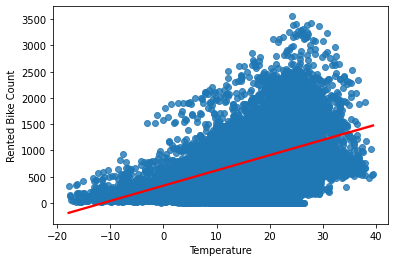

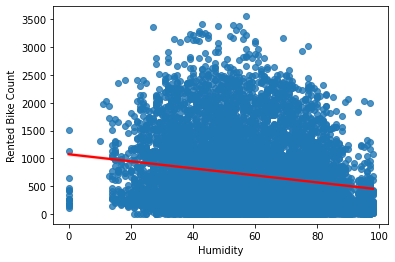

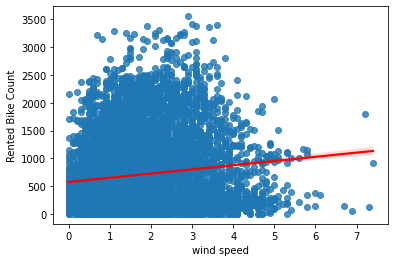

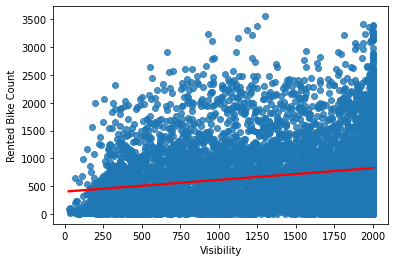

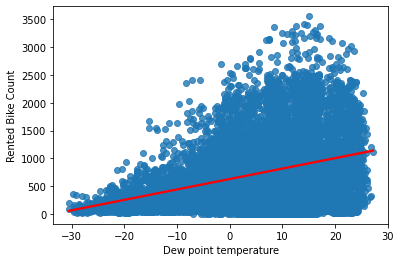

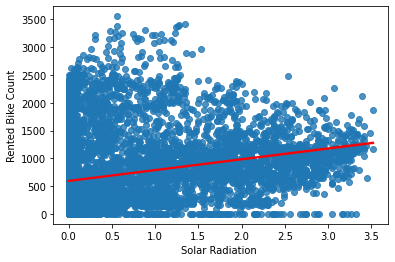

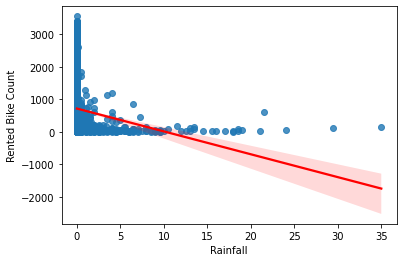

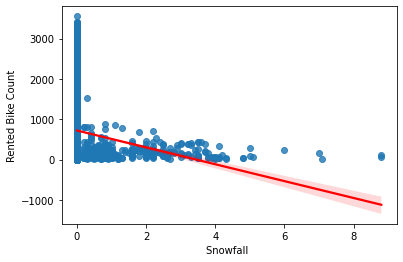

In [ ]:
# ploting Regression plot of each columns of dataset v/s rented bike count columns

for col in numeric_features[:]:
  if col == 'Rented Bike Count':
    pass
  else:
    sns.regplot(x=data[col],y=data["Rented Bike Count"],line_kws={"color": "red"})
  
  plt.show()

# **Coorelation Matrix**

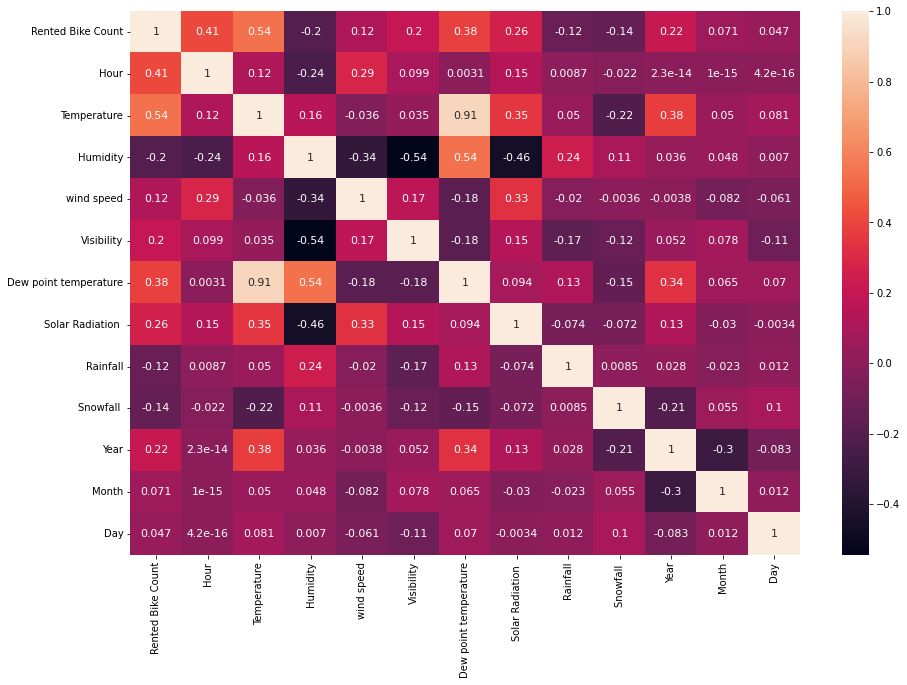

In [ ]:
corr = data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,  cbar=True ,annot=True, annot_kws={'size':11})

# **One Hot Encoding**

In [ ]:
#creating a new column of "weekdays_weekend" and drop the column "Date","day","year"
data['weekdays_weekend']=data['Day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
data=data.drop(columns=['Date','Day','Year'],axis=1)

In [ ]:
data.columns

Index(['Rented Bike Count', 'Hour', 'Temperature', 'Humidity', 'wind speed',
       'Visibility', 'Dew point temperature', 'Solar Radiation ', 'Rainfall',
       'Snowfall ', 'Seasons', 'Holiday', 'Functioning Day', 'Month',
       'weekdays_weekend'],
      dtype='object')

In [ ]:
pd.get_dummies(data['Seasons'], prefix='Seasons', drop_first=True)


,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
8755,0,0,0
8756,0,0,0
8757,0,0,0
8758,0,0,0


In [ ]:
new_data = data

def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

cols = ['Hour', 'Seasons', 'Holiday', 'Functioning Day', 'Month']

for col in cols:
    new_data = one_hot_encoding(new_data, col)
new_data.head()

,Rented Bike Count,Temperature,Humidity,wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,weekdays_weekend,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9,Hour_10,Hour_11,Hour_12,Hour_13,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Assign the value in X and Y
X = new_data.drop(columns=['Rented Bike Count'], axis=1)
y = np.sqrt(new_data['Rented Bike Count'])

## **Before Fitting data into our models lets split the into train and test dataset**

In [ ]:
# Importing train_test_split
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=50)

In [ ]:
X.head()

,Temperature,Humidity,wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,weekdays_weekend,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9,Hour_10,Hour_11,Hour_12,Hour_13,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0
1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0
2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0
3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0
4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented Bike Count, dtype: float64

In [ ]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(7008, 48) (7008,)
(1752, 48) (1752,)


## **In this project we are using seven model on our data set for getting best performance:-**

### LINEAR REGRESSION
### LASSO REGRESSION
### RIDGE REGRESSION
###ELASTICNET REGRESSION
### GRADIENT BOOSTING
### DECISION TREE
### RANDOM FOREST
### XGBOOOST

# **Linner Regression Model**
linear regression have some assumptions, given below are the basic assumptions that a linear regression model makes regarding a dataset on which it is applied:




In [ ]:
#importing linear regression model
from sklearn.linear_model import LinearRegression
reg= LinearRegression().fit(X_train, y_train)

In [ ]:
# all coeffient
reg.score(X_train, y_train)

0.7603855187296256

In [ ]:
# pred train test
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

In [ ]:
#metrics for linear regession analysis
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)




from sklearn.metrics import r2_score
r2= r2_score(y_train, y_pred_train)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 37.0311260552138
RMSE : 6.08532053841158
R2 : 0.7603855187296256
Adjusted R2 : 0.7536318516121987


In [ ]:
#metrics for linear regression analysis for test dataset
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_test), (y_pred_test))
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
r2= r2_score(y_test, y_pred_test)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 37.882593399150124
RMSE : 6.154883703137706
R2 : 0.7584668027178505
Adjusted R2 : 0.7516590555249303


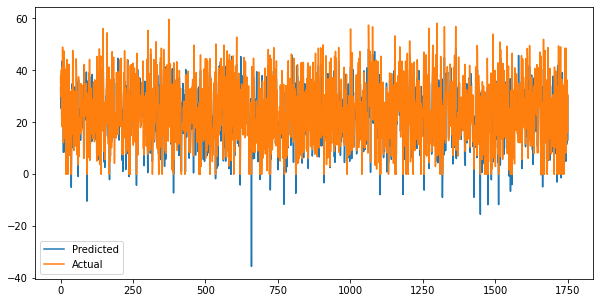

In [ ]:
#predicted vs actual for test data
plt.figure(figsize=(10,5))
plt.plot(np.array(y_pred_test))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

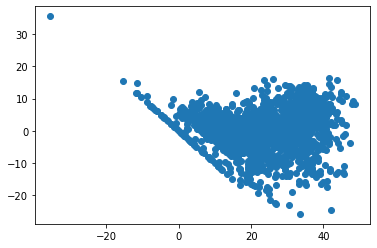

In [ ]:
# Heteroscedasticity
plt.scatter((y_pred_test),(y_test)-(y_pred_test))

# In the end, you should only measure and look at the numbers that drive action, meaning that the data tells you what you should do next. - ALEX PEINIGEER

# **Implementing Lasso Regration**

In [ ]:
#importing lasso regression model
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.1,max_iter=3000)
lasso.fit(X_train,y_train)

Lasso(alpha=0.1, max_iter=3000)

In [ ]:
# lasso score 
lasso.score(X_train, y_train)

0.7193991433367898

In [ ]:
# lasso y pred test and train
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)

In [ ]:
# metrics for lasso regressor flor train dataset
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
from sklearn.metrics import r2_score
r2= r2_score(y_train, y_pred_train_lasso)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 43.36534936956268
RMSE : 6.5852372295584525
R2 : 0.7193991433367898
Adjusted R2 : 0.7114902524854485


In [ ]:
# mterics for lasso regressor flor test dataset
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_test), (y_pred_test_lasso))
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
from sklearn.metrics import r2_score
r2= r2_score(y_test, y_pred_test_lasso)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 43.4651785011789
RMSE : 6.592812639623463
R2 : 0.722873156459647
Adjusted R2 : 0.7150621825959143


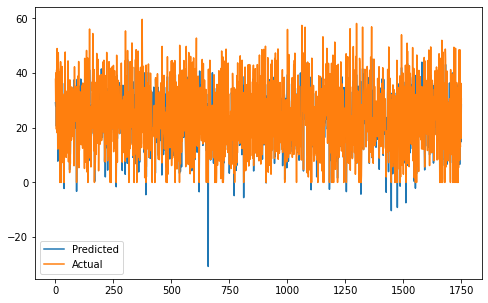

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(np.array(y_pred_test_lasso))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

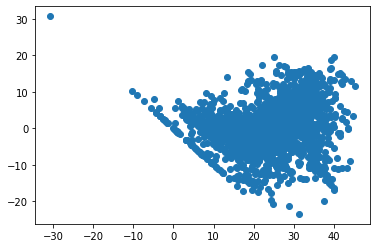

In [ ]:
# Heteroscedasticity
plt.scatter((y_pred_test_lasso),(y_test-y_pred_test_lasso))

# **Implementing Ridge Regression**

In [ ]:
#importing ridge regression
from sklearn.linear_model import Ridge

ridge= Ridge(alpha=0.1)
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [ ]:
# ridge score
ridge.score(X_train, y_train)

0.7603854431086003

In [ ]:
#y pred  ridge test and train
y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)

In [ ]:
# metrics for ridge regression
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_train), (y_pred_train_ridge))
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


from sklearn.metrics import r2_score
r2= r2_score(y_train, y_pred_train_ridge)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 37.0311377420355
RMSE : 6.085321498658513
R2 : 0.7603854431086003
Adjusted R2 : 0.7536317738597529


In [ ]:
# metrics for ridge regression for test
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_test), (y_pred_test_ridge))
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


from sklearn.metrics import r2_score
r2= r2_score(y_test, y_pred_test_ridge)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 37.882268046900464
RMSE : 6.154857272666886
R2 : 0.7584688771103895
Adjusted R2 : 0.751661188385374


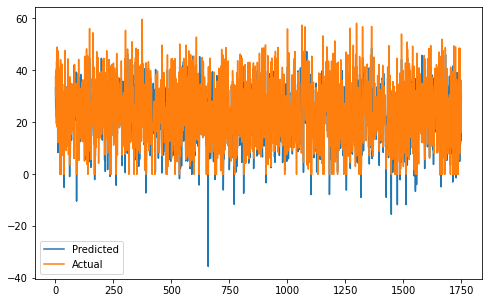

In [ ]:
#plot for ridge 
plt.figure(figsize=(8,5))
plt.plot((y_pred_test_ridge))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

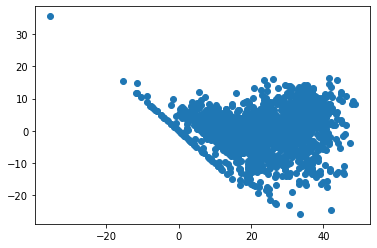

In [ ]:
# Heteroscedasticity
plt.scatter((y_pred_test_ridge),(y_test)-(y_pred_test_ridge))

# **Implementing Elastic Net Regressor**

In [ ]:
#importing elasticNet model
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)
#a*l1+b*l2
#alpha=a+b and l1 ratio=a/a+b
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [ ]:
#elastic net score

elasticnet.score(X_train, y_train)

0.6160614330704103

In [ ]:
#y_predict for train and test dataset
y_pred_train_en=elasticnet.predict(X_train)
y_pred_test_en=elasticnet.predict(X_test)

In [ ]:
#metrics for the elasticnet regression on train
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_train), (y_pred_train_en))
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


from sklearn.metrics import r2_score
r2= r2_score(y_train, y_pred_train_en)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 59.33563528401667
RMSE : 7.702962760134354
R2 : 0.6160614330704103
Adjusted R2 : 0.6052399115127941


In [ ]:
#metrics for the elasticnet regression on test
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_test), (y_pred_test_en))
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

from sklearn.metrics import r2_score
r2= r2_score(y_test, y_pred_test_en)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 59.61213050635593
RMSE : 7.720889230286621
R2 : 0.6199228409128946
Adjusted R2 : 0.609210155278026


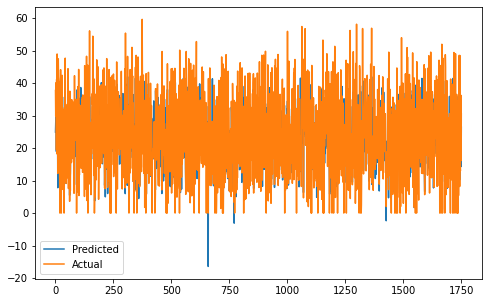

In [ ]:
#plot for pred vs actual for test
plt.figure(figsize=(8,5))
plt.plot(np.array(y_pred_test_en))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

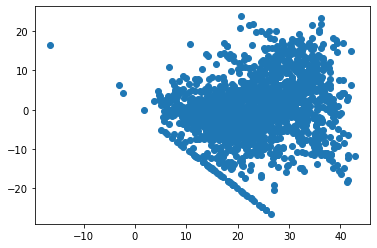

In [ ]:
#Heteroscedasticity
plt.scatter((y_pred_test_en),(y_test)-(y_pred_test_en))

# **Implementing of decision tree by using decision tree regressor**

In [ ]:
#importing the decision tree model for training 
decision_regressor = DecisionTreeRegressor(criterion='mse', max_depth=8,
                      max_features=9, max_leaf_nodes=100,)
decision_regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=9,
                      max_leaf_nodes=100)

In [ ]:
#y pred for test and train data
y_pred_train_dt = decision_regressor.predict(X_train)
y_pred_test_dt = decision_regressor.predict(X_test)

In [ ]:
#metric for decison tree for train data
from sklearn.metrics import mean_squared_error
print("Model Score:",decision_regressor.score(X_train,y_train))

MSE= mean_squared_error(y_train, y_pred_train_dt)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

from sklearn.metrics import r2_score
r2= r2_score(y_train, y_pred_train_dt)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_dt))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.6926505638240831
MSE : 47.49919810224951
RMSE : 6.891966200022277
R2 : 0.6926505638240831
Adjusted R2 : 0.6839877494163062


In [ ]:
#metric for decison tree for test data
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error(y_test, y_pred_test_dt)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

from sklearn.metrics import r2_score
r2= r2_score((y_test), (y_pred_test_dt))
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_dt)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 55.98283569878599
RMSE : 7.482167847541646
R2 : 0.6430626288760792
Adjusted R2 : 0.6330021510052934


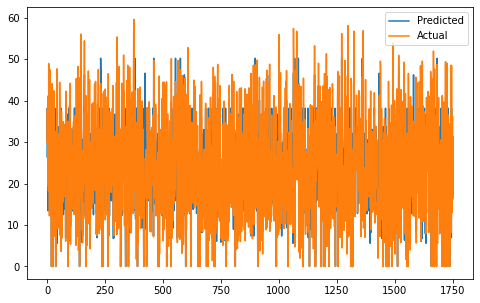

In [ ]:
#pred vs actual for decision tree
plt.figure(figsize=(8,5))
plt.plot((np.array(y_pred_test_dt)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

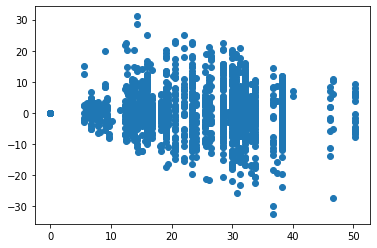

In [ ]:
# Heteroscedasticity
plt.scatter((y_pred_test_dt),(y_test)-(y_pred_test_dt))

# **Implementing Random forest Rergressor**

In [ ]:
#creating an instance for the random forest
rf_model=RandomForestRegressor()
rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
# Making predictions on train and test data in rf

y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)

In [ ]:
#metric score for the rf for train dataset
from sklearn.metrics import mean_squared_error
print("Model Score:",rf_model.score(X_train,y_train))

MSE= mean_squared_error(y_train, y_pred_train_rf)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
from sklearn.metrics import r2_score
r2= r2_score(y_train, y_pred_train_rf)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.9851747306499572
MSE : 2.2911654387217926
RMSE : 1.5136596178539587
R2 : 0.9851747306499572
Adjusted R2 : 0.9847568722067381


In [ ]:
#metric score for the rf for test dataset
print("Model Score:",rf_model.score(X_test,y_test))

MSE= mean_squared_error(y_test, y_pred_test_rf)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
from sklearn.metrics import r2_score
r2= r2_score(y_test, y_pred_test_rf)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.8867224857204999
MSE : 17.766692376054046
RMSE : 4.215055441634671
R2 : 0.8867224857204999
Adjusted R2 : 0.883529696122487


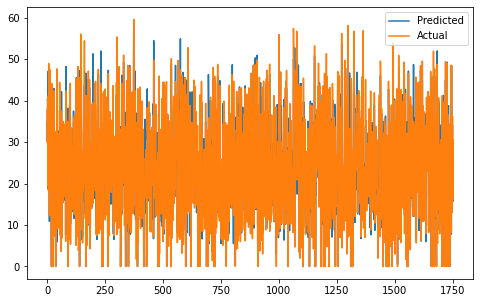

In [ ]:
#pred vs actual for random forest
plt.figure(figsize=(8,5))
plt.plot((np.array(y_pred_test_rf)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

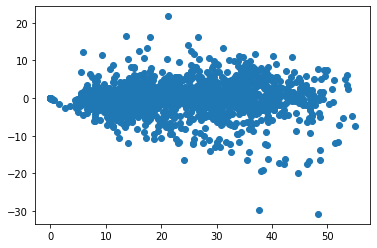

In [ ]:
#Heteroscedasticity
plt.scatter((y_pred_test_rf),(y_test)-(y_pred_test_rf))

In [ ]:
# random forest important feature selection
rf_model.feature_importances_

array([3.04905178e-01, 1.60124523e-01, 1.50864176e-02, 1.40715677e-02,
       2.17191780e-02, 2.94609133e-02, 2.82451724e-02, 9.80444414e-04,
       0.00000000e+00, 4.62766239e-03, 1.26688778e-02, 2.20122495e-02,
       3.29835639e-02, 2.81364382e-02, 1.05575465e-02, 3.64249270e-03,
       1.60334893e-02, 7.40881357e-04, 1.85860684e-03, 8.27913015e-04,
       3.89719157e-04, 2.17808687e-04, 2.33072268e-04, 9.13558563e-04,
       3.01186943e-03, 1.00801508e-02, 3.26950838e-02, 1.47926938e-02,
       1.11493917e-02, 1.18344105e-02, 8.82404290e-03, 3.35782635e-03,
       6.58288373e-03, 1.56658264e-03, 1.00461266e-02, 2.90499967e-03,
       1.55306281e-01, 6.96118743e-04, 2.80967375e-03, 1.48605257e-03,
       2.13713485e-03, 1.05743593e-03, 8.49989051e-04, 1.52726498e-03,
       1.58945788e-03, 1.78162223e-03, 2.56201672e-03, 9.13615947e-04])

In [ ]:
importance_rf=rf_model.feature_importances_

In [ ]:
imortance_rf_dict={"Feature":list(X_train.columns),"Feature importance":importance_rf}
imortance_rf_df=pd.DataFrame(imortance_rf_dict)
imortance_rf_df["Feature importance"]=round(imortance_rf_df["Feature importance"],2)

In [ ]:
imortance_rf_df.sort_values(by=["Feature importance"],ascending=False)


,Feature,Feature importance
0,Temperature,0.30
1,Humidity,0.16
36,Functioning Day_Yes,0.16
26,Hour_18,0.03
5,Solar Radiation,0.03
6,Rainfall,0.03
13,Hour_5,0.03
12,Hour_4,0.03
11,Hour_3,0.02
16,Hour_8,0.02


In [ ]:
rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
features=X_train.columns
importance_rf=rf_model.feature_importances_
indices=np.argsort(importance_rf)

## **Training Random forest Regressor from GridesearchCV**

In [ ]:
# number of trees
n_estimators=[50,80,100]

#max deapth of tree
max_depth=[4,6,8]

#minimum no of sample required for spliting the node
min_samples_split=[50,100,150]

#minimum no of sample required at each leaf node
min_samples_leaf=[40,50]
#hyper parametr gride
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
param_dict

{'max_depth': [4, 6, 8],
 'min_samples_leaf': [40, 50],
 'min_samples_split': [50, 100, 150],
 'n_estimators': [50, 80, 100]}

# **Importing Random forest Regressor**

In [ ]:
# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor()

# Grid search
rf_grid = GridSearchCV(estimator=rf_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2)

rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.8s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.8s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.8s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.8s
[CV] END max_depth=4, min_sam

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             verbose=2)

In [ ]:
rf_grid.best_estimator_

RandomForestRegressor(max_depth=8, min_samples_leaf=40, min_samples_split=50)

In [ ]:
rf_optimal_model = rf_grid.best_estimator_

In [ ]:
# Making predictions on train and test data

y_pred_train_r_g = rf_optimal_model.predict(X_train)
y_pred_test_r_g = rf_optimal_model.predict(X_test)

In [ ]:
#metrics for rf score with gd for train
from sklearn.metrics import mean_squared_error
print("Model Score:",rf_optimal_model.score(X_train,y_train))

MSE= mean_squared_error(y_train, y_pred_train_r_g)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


from sklearn.metrics import r2_score
r2= r2_score(y_train, y_pred_train_r_g)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_r_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.7839034029131975
MSE : 33.396563865414116
RMSE : 5.778976022221767
R2 : 0.7839034029131975
Adjusted R2 : 0.7778126004116317


In [ ]:
#metrics for rf score with gd for test
from sklearn.metrics import mean_squared_error
print("Model Score:",rf_optimal_model.score(X_train,y_train))

MSE= mean_squared_error(y_test, y_pred_test_r_g)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


from sklearn.metrics import r2_score
r2= r2_score(y_test, y_pred_test_r_g)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test_r_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.7839034029131975
MSE : 35.530160923585406
RMSE : 5.960718155020031
R2 : 0.7734655260424858
Adjusted R2 : 0.7670805261893086


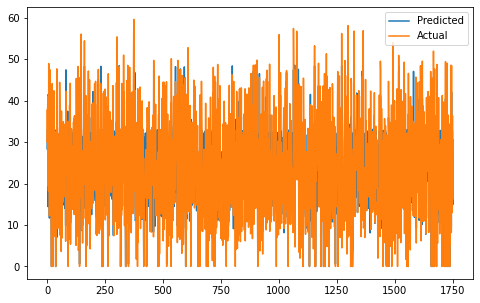

In [ ]:
#pred vs actual for random forest
plt.figure(figsize=(8,5))
plt.plot((np.array(y_pred_test_r_g)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
# for the important features
rf_optimal_model.feature_importances_

array([3.69509060e-01, 2.04515846e-01, 2.52310478e-03, 1.93087582e-03,
       3.39971364e-03, 2.59931415e-02, 2.59862774e-02, 2.94147747e-04,
       0.00000000e+00, 0.00000000e+00, 4.55427098e-03, 1.80947816e-02,
       2.81406130e-02, 1.50534490e-02, 1.21608437e-03, 0.00000000e+00,
       3.12008806e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 5.76047330e-03, 3.72247440e-02, 1.41847511e-02,
       5.78567342e-03, 4.92603849e-03, 1.14423376e-03, 2.63310173e-04,
       5.19551171e-03, 1.06877137e-04, 1.42413508e-02, 4.39163794e-05,
       2.03595322e-01, 7.96035701e-05, 1.12927107e-04, 0.00000000e+00,
       7.87349903e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.34559669e-03, 1.40225177e-03, 1.77230075e-04])

In [ ]:
#important feature selection
importance_rf_gd=rf_optimal_model.feature_importances_
imortance_rf_gddict={"Feature":list(X_train.columns),"Feature importance":importance_rf_gd}
imortance_rf_gddf=pd.DataFrame(imortance_rf_gddict)

In [ ]:
imortance_rf_gddf['Feature importance'] = round(imortance_rf_gddf['Feature importance'],2)

In [ ]:
#reading table of important features
imortance_rf_gddf.head()

,Feature,Feature importance
0,Temperature,0.37
1,Humidity,0.20
2,wind speed,0.00
3,Visibility,0.00
4,Dew point temperature,0.00


In [ ]:
#featuer in ascending order
#featuer in ascending order
imortance_rf_gddf.sort_values(by=["Feature importance"],ascending=False)

,Feature,Feature importance
0,Temperature,0.37
1,Humidity,0.20
36,Functioning Day_Yes,0.20
26,Hour_18,0.04
5,Solar Radiation,0.03
6,Rainfall,0.03
12,Hour_4,0.03
13,Hour_5,0.02
11,Hour_3,0.02
27,Hour_19,0.01


In [ ]:
rf_optimal_model.fit(X_train,y_train)

RandomForestRegressor(max_depth=8, min_samples_leaf=40, min_samples_split=50)

In [ ]:
features=X_train.columns
importance_rfgd=rf_optimal_model.feature_importances_
indices=np.argsort(importance_rfgd)

# **Implementing Gradient Boosting Regression**

In [ ]:
# gradient boosting model import
gbd_model=GradientBoostingRegressor()
gbd_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [ ]:
# Making predictions on train and test data

y_pred_train_gb = gbd_model.predict(X_train)
y_pred_test_gb = gbd_model.predict(X_test)

In [ ]:
# for train data set
print("Model Score:",gbd_model.score(X_train,y_train))
MSE= mean_squared_error(y_train, y_pred_train_gb)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

r2= r2_score(y_train, y_pred_train_gb)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_gb))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.8627849600092803
MSE : 21.205844553418405
RMSE : 4.604980407495606
R2 : 0.8627849600092803
Adjusted R2 : 0.8589174779660891


In [ ]:
# for test data set
print("Model Score:",gbd_model.score(X_train,y_train))
MSE= mean_squared_error(y_test, y_pred_test_gb)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

r2= r2_score((y_test), (y_pred_test_gb))
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_gb)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.8627849600092803
MSE : 24.45482735319885
RMSE : 4.945182236601483
R2 : 0.8440800349288231
Adjusted R2 : 0.839685344192818


In [ ]:
# for test data set
print("Model Score:",gbd_model.score(X_train,y_train))
MSE= mean_squared_error(y_test, y_pred_test_gb)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

r2= r2_score((y_test), (y_pred_test_gb))
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_gb)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.8627849600092803
MSE : 24.45482735319885
RMSE : 4.945182236601483
R2 : 0.8440800349288231
Adjusted R2 : 0.839685344192818


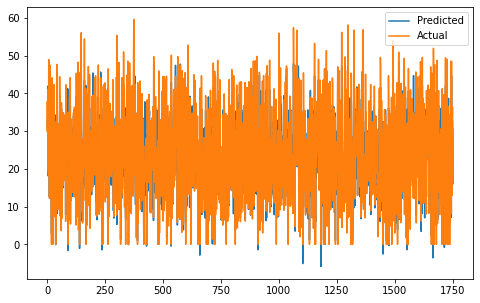

In [ ]:
#pred vs actual for Gradient boosting
plt.figure(figsize=(8,5))
plt.plot((np.array(y_pred_test_gb)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

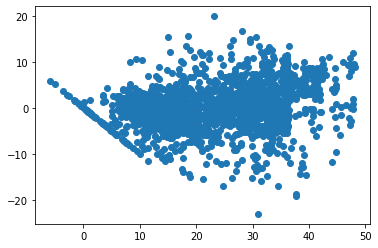

In [ ]:
#Heteroscedasticity
plt.scatter((y_pred_test_gb),(y_test)-(y_pred_test_gb))

In [ ]:
#feature importance
gbd_model.feature_importances_

array([3.04462930e-01, 1.39551413e-01, 6.58769026e-04, 1.11481984e-03,
       1.31125006e-02, 4.95393402e-02, 5.38267468e-02, 1.67898494e-04,
       0.00000000e+00, 3.83992519e-04, 5.50596449e-03, 1.41513878e-02,
       2.75630628e-02, 2.34465501e-02, 6.16146831e-03, 6.32191131e-05,
       1.17038932e-02, 0.00000000e+00, 2.72090787e-03, 1.39519545e-03,
       0.00000000e+00, 0.00000000e+00, 2.75605285e-05, 0.00000000e+00,
       3.38549042e-04, 7.58887521e-03, 3.19701654e-02, 1.55607608e-02,
       1.20660077e-02, 1.79393677e-02, 1.15106915e-02, 6.41832534e-04,
       2.40120094e-03, 0.00000000e+00, 4.96930432e-02, 2.58121071e-03,
       1.85992222e-01, 0.00000000e+00, 4.61442322e-04, 0.00000000e+00,
       0.00000000e+00, 1.44903774e-03, 8.00669678e-05, 0.00000000e+00,
       9.35804725e-05, 2.27744028e-03, 1.68552033e-03, 1.11364903e-04])

In [ ]:
#creating a data frame for important features
importances_gb = gbd_model.feature_importances_

importance_dictgb = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances_gb}

importance_dfgb = pd.DataFrame(importance_dictgb)

In [ ]:
importance_dfgb['Feature Importance'] = round(importance_dfgb['Feature Importance'],2)

In [ ]:
#reading the important features
importance_dfgb.head()

,Feature,Feature Importance
0,Temperature,0.30
1,Humidity,0.14
2,wind speed,0.00
3,Visibility,0.00
4,Dew point temperature,0.01


In [ ]:
importance_dfgb.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
0,Temperature,0.30
36,Functioning Day_Yes,0.19
1,Humidity,0.14
5,Solar Radiation,0.05
6,Rainfall,0.05
34,Seasons_Winter,0.05
26,Hour_18,0.03
12,Hour_4,0.03
29,Hour_21,0.02
27,Hour_19,0.02


In [ ]:
gbd_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [ ]:
features = X_train.columns
importances =gbd_model.feature_importances_
indices = np.argsort(importances)

# **Training Gradient Regressor with GridsearchCV**

In [ ]:
# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()

# Grid search
gb_grid = GridSearchCV(estimator=gb_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2)

gb_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.0s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.0s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.0s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.0s
[CV] END max_depth=4, min_sam

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             verbose=2)

In [ ]:
gb_grid.best_estimator_

GradientBoostingRegressor(max_depth=8, min_samples_leaf=40,
                          min_samples_split=50)

In [ ]:
gb_optimal_model = gb_grid.best_estimator_

In [ ]:
gb_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 100}

In [ ]:
# Making predictions on train and test data

y_pred_train_gd_g = gb_optimal_model.predict(X_train)
y_pred_test_gd_g= gb_optimal_model.predict(X_test)

In [ ]:
#gd with grid cv train performance
print("Model Score:",gb_optimal_model.score(X_train,y_train))
MSE= mean_squared_error(y_train, y_pred_train_gd_g)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

r2= r2_score(y_train, y_pred_train_gd_g)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_gd_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.9295383471400533
MSE : 10.889468513262223
RMSE : 3.299919470723827
R2 : 0.9295383471400533
Adjusted R2 : 0.9275523463548053


In [ ]:
#metrics for rf score with gd for train
from sklearn.metrics import mean_squared_error
print("Model Score:",gb_optimal_model.score(X_train,y_train))

MSE= mean_squared_error(y_test, y_pred_test_gd_g)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


from sklearn.metrics import r2_score
r2= r2_score(y_test, y_pred_test_gd_g)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test_gd_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.9295383471400533
MSE : 17.212905743873648
RMSE : 4.148843904496004
R2 : 0.8902533383860844
Adjusted R2 : 0.8871600678297321


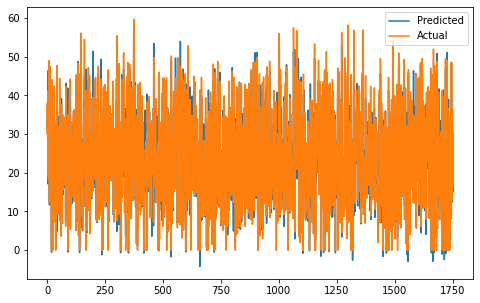

In [ ]:
#pred vs actual for Gradient boosting
plt.figure(figsize=(8,5))
plt.plot((np.array(y_pred_test_gd_g)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

# **Implementing Xgboost Regressor**

In [ ]:
# Create an instance of the RandomForestRegressor
import xgboost as xgb
xg_model = xgb.XGBRegressor()


xg_model.fit(X_train,y_train)

[18:10:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
# Making predictions on train and test data

y_pred_train_xg = xg_model.predict(X_train)
y_pred_test_xg = xg_model.predict(X_test)

In [ ]:
#xg boost on train data
print("Model Score:",xg_model.score(X_train,y_train))
MSE= mean_squared_error(y_train, y_pred_train_xg)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

r2= r2_score(y_train, y_pred_train_xg)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_xg))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.8609863815399221
MSE : 21.483805157743664
RMSE : 4.635062584015848
R2 : 0.8609863815399221
Adjusted R2 : 0.8570682055645353


In [ ]:
#Xg boost for test
MSE= mean_squared_error(y_test, y_pred_test_xg)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

r2= r2_score((y_test), (y_pred_test_xg))
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_xg)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 24.578688104831187
RMSE : 4.9576897951395855
R2 : 0.843290319107514
Adjusted R2 : 0.8388733697928696


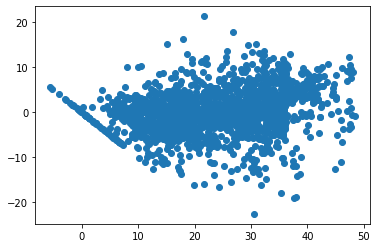

In [ ]:
#Heteroscedasticity
plt.scatter((y_pred_test_xg),(y_test)-(y_pred_test_xg))

In [ ]:
xg_model.feature_importances_

array([0.07213112, 0.059112  , 0.00272321, 0.00452747, 0.01551383,
       0.0370674 , 0.05231315, 0.00533385, 0.        , 0.00698735,
       0.02296982, 0.03910279, 0.0429541 , 0.04167703, 0.02520509,
       0.002929  , 0.02404978, 0.        , 0.01297839, 0.01043565,
       0.        , 0.        , 0.00077807, 0.        , 0.00377369,
       0.01887072, 0.05253814, 0.03962607, 0.03132134, 0.04153382,
       0.03887022, 0.00652846, 0.00629494, 0.00643899, 0.06378728,
       0.00676878, 0.16243628, 0.        , 0.0057186 , 0.        ,
       0.        , 0.00448455, 0.00117852, 0.        , 0.00035288,
       0.01861732, 0.01207033, 0.        ], dtype=float32)

In [ ]:
importances = xg_model.feature_importances_

importance_dictxg = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_dfxg = pd.DataFrame(importance_dictxg)

In [ ]:
importance_dfxg['Feature Importance'] = round(importance_dfxg['Feature Importance'],2)

In [ ]:
xg_model.fit(X_train,y_train)

[18:10:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
features = X_train.columns
importances = xg_model.feature_importances_
indices = np.argsort(importances)

# **Training bold text Xgboost regressor with Gridsearch**

# **Provide the range for Hyperparameter**

In [ ]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict_xgb = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf,'learning_rate': [0.1, 0.05, 0.01, 0.005]}

In [ ]:
import xgboost as xgb
xg_model = xgb.XGBRegressor()


xg_model.fit(X_train,y_train)

[18:10:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
# Grid search
xg_grid = GridSearchCV(estimator=xg_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2)

xg_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[18:10:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[18:10:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[18:10:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[18:10:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[18:10:34] WARNING: /works

GridSearchCV(cv=5, estimator=XGBRegressor(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             verbose=2)

In [ ]:
xg_grid.best_estimator_
xg_optimal_model = xg_grid.best_estimator_
xg_grid.best_params_
# Making predictions on train and test data

y_pred_train_x_g = xg_optimal_model.predict(X_train)
y_pred_test_x_g  = xg_optimal_model.predict(X_test)

In [ ]:
#xg after training score for train data
print("Model Score:",xg_optimal_model.score(X_train,y_train))
MSE= mean_squared_error(y_train, y_pred_train_x_g)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
r2= r2_score(y_train, y_pred_train_x_g)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_x_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.9674298955235844
MSE : 5.033534025586255
RMSE : 2.2435538829246457
R2 : 0.9674298955235844
Adjusted R2 : 0.9665118890556643


In [ ]:
#Xg boost  after training for test
print("Model Score:",xg_optimal_model.score(X_train,y_train))
MSE= mean_squared_error(y_test, y_pred_test_x_g)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

r2= r2_score((y_test), (y_pred_test_x_g))
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_x_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.9674298955235844
MSE : 17.314957566633634
RMSE : 4.1611245555298675
R2 : 0.8896026727154431
Adjusted R2 : 0.8864910627861073


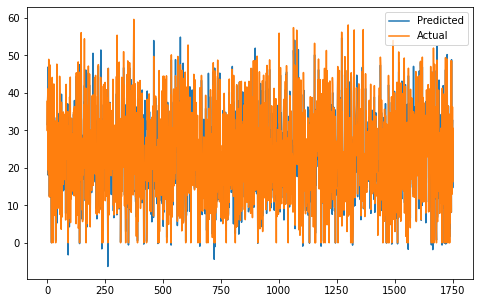

In [ ]:
plt.figure(figsize=(8,5))
plt.plot((y_pred_test_x_g))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()


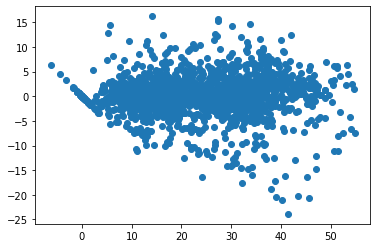

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test_x_g),(y_test)-(y_pred_test_x_g))

# **Features importance with XGBOOST training**

In [ ]:
xg_optimal_model.feature_importances_

array([0.02129464, 0.02074557, 0.00181379, 0.00148788, 0.0036093 ,
       0.00658446, 0.03125793, 0.00203383, 0.        , 0.01008294,
       0.03176845, 0.05246026, 0.05511423, 0.05648836, 0.0230926 ,
       0.00438529, 0.02829843, 0.00189968, 0.01210156, 0.0072995 ,
       0.00307373, 0.00165584, 0.00133828, 0.00123789, 0.00493798,
       0.03130131, 0.06484171, 0.04495445, 0.05063533, 0.04540903,
       0.03060484, 0.00983521, 0.0087675 , 0.00298693, 0.05010926,
       0.00321011, 0.24611673, 0.00076747, 0.00204631, 0.00211943,
       0.00342794, 0.00301894, 0.00102531, 0.00266252, 0.00294245,
       0.00407635, 0.00391781, 0.00116053], dtype=float32)

In [ ]:
importances = xg_optimal_model.feature_importances_

importance_dictxgt = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_dfxgt = pd.DataFrame(importance_dictxgt)

In [ ]:
importance_dfxgt['Feature Importance'] = round(importance_dfxgt['Feature Importance'],2)

In [ ]:
importance_dfxgt.head()

,Feature,Feature Importance
0,Temperature,0.02
1,Humidity,0.02
2,wind speed,0.00
3,Visibility,0.00
4,Dew point temperature,0.00


In [ ]:
importance_dfxgt.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
36,Functioning Day_Yes,0.25
26,Hour_18,0.06
12,Hour_4,0.06
13,Hour_5,0.06
11,Hour_3,0.05
34,Seasons_Winter,0.05
29,Hour_21,0.05
28,Hour_20,0.05
27,Hour_19,0.04
25,Hour_17,0.03


In [ ]:
features = X_train.columns
importances = xg_optimal_model.feature_importances_
indices = np.argsort(importances)

In [ ]:
from tabulate import tabulate
data = [['1','Linear Regression','   37.882593399150124','6.154883703137706','  0.7603855187296256','0.7536318516121987'],
['2','lasso Regression','   43.36534936956268',' 6.5852372295584525',' 0.7193991433367898',' 0.7114902524854485'],
['3','Ridge Regression','37.0311377420355','  6.085321498658513',' 0.7603854431086003','0.7536317738597529'],
['4','Elastic net regressor','59.33563528401667',' 7.702962760134354',' 0.6160614330704103',' 0.6052399115127941'],
['5','Decision Tree regressor',' 64.11362055205679',' 8.007098135533047','0.5851448884367985',' 0.5734519669129972'],
['6','Random forest regressor',' 33.353865182968505',' 5.7752805285084206','0.7841796900190737',' 0.7780966748228997'],
['7','Gradient Boost','10.889468513262226','3.2999194707238275','0.9295383471400532',' 0.9275523463548052'],
['8','XGBoost',' 5.033534025586255','  2.2435538829246457',' 0.9674298955235844','0.9665118890556643']
] 
print(tabulate(data, headers=['SL NO',"MODEL_NAME", "Train MSE", "Train RMSE",'Train R^2','Train Adjusted R^2']))

  SL NO  MODEL_NAME                 Train MSE    Train RMSE    Train R^2    Train Adjusted R^2
-------  -----------------------  -----------  ------------  -----------  --------------------
      1  Linear Regression           37.8826        6.15488     0.760386              0.753632
      2  lasso Regression            43.3653        6.58524     0.719399              0.71149
      3  Ridge Regression            37.0311        6.08532     0.760385              0.753632
      4  Elastic net regressor       59.3356        7.70296     0.616061              0.60524
      5  Decision Tree regressor     64.1136        8.0071      0.585145              0.573452
      6  Random forest regressor     33.3539        5.77528     0.78418               0.778097
      7  Gradient Boost              10.8895        3.29992     0.929538              0.927552
      8  XGBoost                      5.03353       2.24355     0.96743               0.966512


In [ ]:
from tabulate import tabulate
data = [['1','Linear Regression','   37.882593399150124','6.154883703137706',' 0.7584668027178505',' 0.7516590555249303'],
['2','lasso Regression','  43.4651785011789','6.592812639623463',' 0.722873156459647',' 0.7150621825959143'],
['3','Ridge Regression','37.882268046900464',' 6.154857272666886','0.7584688771103895','0.751661188385374'],
['4','Elastic net regressor',' 59.61213050635593','7.720889230286621',' 0.6199228409128946',' 0.609210155278026'],
['5','Decision Tree regressor','69.82620810129173',' 8.356207758384883',' 0.5547995587553389','0.5422513372757478'],
['6','Random forest regressor','35.32411075199165','4.237711349154476',' 0.7747792681145027','0.7684312968106248'],
['7','Gradient Boost','17.21347019327704','4.148911928840746',' 0.8902497395493398',' 0.8871563675577769'],
['8','XGBoost','17.314957566633634','4.1611245555298675','0.8896026727154431',' 0.8864910627861073']
] 
print(tabulate(data, headers=['SL NO',"MODEL_NAME", "Train MSE", "Train RMSE",'Train R^2','Train Adjusted R^2']))

  SL NO  MODEL_NAME                 Train MSE    Train RMSE    Train R^2    Train Adjusted R^2
-------  -----------------------  -----------  ------------  -----------  --------------------
      1  Linear Regression            37.8826       6.15488     0.758467              0.751659
      2  lasso Regression             43.4652       6.59281     0.722873              0.715062
      3  Ridge Regression             37.8823       6.15486     0.758469              0.751661
      4  Elastic net regressor        59.6121       7.72089     0.619923              0.60921
      5  Decision Tree regressor      69.8262       8.35621     0.5548                0.542251
      6  Random forest regressor      35.3241       4.23771     0.774779              0.768431
      7  Gradient Boost               17.2135       4.14891     0.89025               0.887156
      8  XGBoost                      17.315        4.16112     0.889603              0.886491


# **What gets measured, gets managed. -**

# **Conclusion:**



*  As it was stated in the problem, rented bike count was low in 2017 untill november. That is when business took off and rented bike count started increasing.

* There was sharp increase in demand from the end of 2017 that too in winter season of the year. The demand however decrease at the end of 2018.
*   bike count rent is highly correlated with 'Hour', which seems obvious. Demand for bike is mostly in morning (7 to 8) and in the evening (3 to 9).
*  After doing exploratory data analysis, applying Linear Regression model didn't go quite well as it gave only 75% accuracy.
* Lasso and Ridge Regression helps to reduce model complexity and prevent over-fitting which may result from simple linear regression. with Lasso, ridge and ElsasticNet regressor We got r squared value of 0.71, 0.75, 0.60 respectively
* With Decision tree we reached at the model r squared value of 0.62.
* Random forest regressor gave r squared value of 0.79 on test data.
* Gradient Boost gave r squared value of 0.85.
* XGBOOST came for the rescue to help us get best accuracy to approximate numbers of rented bikes demand. It gave amazing results of training r-square at 0.96 and test r-square value at 0.88 also with adjusted r-square with 0.96.

